# 章節 1 - 如何零基礎入門深度學習

# <font color='LIGHTGREEN'>單元 4 - 資料下載與預處理實作</font>

## <font color='SKYBLUE'>本單元課程大綱:</font>
### 1-4-1.連接☁雲端硬碟
### 1-4-2.資料下載_實作手寫數字數據集下載(MNIST)
### 1-4-3.數據集分割(訓練、驗證、測試)

## 1-4-1.連接☁雲端硬碟

In [0]:
#1401 連接☁雲端硬碟，連結時需要一些時間是正常的
# 課程所練習的檔案就不會消失囉
from google.colab import drive
drive.mount('/content/drive')
# Mounted at /content/drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


1.run 2.點連結 3.另開新頁選帳號 4.允許 5.複製授權碼 

6.回colab貼上+Enter 7.最左邊選Files 8.Refresh(更新)

9.drive > My Drive 就是你的雲端硬碟

### 把工作資料夾(所在目錄)設為課程資料夾，很重要~

In [0]:
#1402 cd 變更工作目錄 > 複製路徑Copy path 
# Linux命令太長要續行可以\+Enter，新行不可有空白
%cd "/content/drive/My Drive/94AI深度學習-新手入門應用篇/\
章節 1 - 如何零基礎入門深度學習/1-4_資料下載與預處理實作"
#對照左邊files，再跟著老師操作一次 

/content/drive/My Drive/94AI深度學習-新手入門應用篇/章節 1 - 如何零基礎入門深度學習/1-4_資料下載與預處理實作


### 🔔colab硬碟隨時有<font color='GOLD'>可能消失</font>，因為是VM虛擬電腦
12小時、網路、當機...各種不確定因素，執行後的檔案、訓練出的模型要記得隨時備份

### 如何將`雲端硬碟檔案`複製到`colab`

### 要複製前，要先知道目前資料夾`!pwd`

In [0]:
!pwd

/content/drive/My Drive/94AI深度學習-新手入門應用篇/章節 1 - 如何零基礎入門深度學習/1-4_資料下載與預處理實作


In [0]:
#1404 雲端硬碟檔案 複製到 VM虛擬機(/content)
!cp '1-4.jpg' /content # !cp檔案複製 來源 目的
#複製後，不是立即就出現，會有時間差，檔案越大越明顯
#在/content下檔案VM結束就消失
#例外:/content/drive/My Drive不會消失，why?

### 🔔觀念小結:執行Colab筆記本記得掛接雲端硬碟並%cd

### 練習1.複製`colab`檔案至`雲端硬碟`

In [0]:
#1405
!cp "/content/sample_data/mnist_test.csv" mnist_test.csv 
#目的路徑如果省略，就是複製到目前路徑

## 1-4-2.資料下載_實作手寫數字數據集下載(MNIST)

### A.原始圖片下載

### 從網路下載數據集到雲端硬碟
(第一次執行即可，同學第二次練習就不須再下載)

In [0]:
#1405 下載手寫數字數據集原始圖片檔 %%time 計時器
%%time 
!wget https://github.com/myleott/mnist_png/raw/master/mnist_png.tar.gz
#檔案名稱 mnist_png.tar.gz

--2020-03-08 12:39:07--  https://github.com/myleott/mnist_png/raw/master/mnist_png.tar.gz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/myleott/mnist_png/master/mnist_png.tar.gz [following]
--2020-03-08 12:39:07--  https://raw.githubusercontent.com/myleott/mnist_png/master/mnist_png.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15683414 (15M) [application/octet-stream]
Saving to: ‘mnist_png.tar.gz.1’

mnist_png.tar.gz.1  100%[===================>]  14.96M  25.2MB/s    in 0.6s    

2020-03-08 12:39:08 (25.2 MB/s) - ‘mnist_png.tar.gz.1’ saved [15683414/15683414]

CPU times: user 49.4 ms, sys

### 解壓縮檔案(第一次執行即可)

In [0]:
#1406 解壓縮
%%time
!tar zxf mnist_png.tar.gz

CPU times: user 2.34 s, sys: 257 ms, total: 2.6 s
Wall time: 9min 44s


### 顯示檔案數量

In [0]:
#1408 顯示特定目錄下的檔案數量
!find mnist_png -type f -name *.png| wc -l #wc統計檔案 -l多少行
!find mnist_png/training -type f -name *.png| wc -l  
!find mnist_png/testing -type f -name *.png| wc -l  

70000
60000
10000


### 顯示圖形檔案`.png`

In [0]:
#1410 路徑
from IPython.display import Image
#絕對路徑
Image("/content/drive/My Drive/94AI深度學習-新手入門應用篇/\
    章節 1 - 如何零基礎入門深度學習/1-4_資料下載與預處理實作/\
    mnist_png/testing/0/10.png")
#相對路徑
Image("mnist_png/testing/0/10.png", width=100) #可以調整顯示寬度 width=100

## 下載手寫數字圖片

In [0]:
from google.colab import files
files.download('mnist_png/testing/0/10.png') #檔名就是label

### B.從TensorFlow模組載入Dataset(數據集)，數值化資料，已不是圖片

### 匯入TensorFlow 2.x 深度學習模組

In [0]:
#1406 import匯入 tensorflow as成為 tf(可以自訂,慣用tf)
try:
    %tensorflow_version 2.x #1203 指定使用tensorflow 2.x
except Exception:
    pass
import tensorflow as tf # tf 1.X升級為2.X

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x #1203 指定使用tensorflow 2.x`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


### `TensorFlow`就是深度學習`工具包`

### TensorFlow一直`在進化`，查看版本

In [0]:
#1407
print(tf.__version__)

2.1.0


### `tf`已內建很多常用的`數據集`，學深度學習要`用對方法`

In [0]:
#1408 tfds.list_builders()數據集清單
import tensorflow_datasets as tfds
#查看資料型態
print(type(tfds.list_builders())) 

<class 'list'>


### 什麼是`開放原始碼`，試試`Ctrl+click`

### 查看有哪些`數據集`

In [0]:
#1409 順便複習list
#查看內建的數據集的數量 len()
print( len( tfds.list_builders() ) ) 
#查看內建的數據集的清單前10筆 [0:9]
tfds.list_builders()[0:10] 

141


['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist']

### 從`tf`模組中載入手寫`MNIST`數據集

In [0]:
#1410 透過tf模組下載數據集
mnist = tf.keras.datasets.mnist

## 1-4-3.數據集分割(訓練、驗證、測試)

### 載入數據集並分割處理

In [0]:
# 1411 數據集分割為:訓練集train、測試集test
# 每個集的組成(x:data數據,y:label標籤)
# (x_train:訓練用data, y_train:訓練用label), (x_test:測試用data, y_test:測試用label)   
(x_train, y_train), (x_test, y_test) = mnist.load_data() # 載入數據

11493376/11490434 [==============================] - 0s 0us/step


### `數據`有多少筆?

In [0]:
#1412 .shape 取的矩陣的形狀
x_train.shape
#(訓練集筆數,像素,像素)

(60000, 28, 28)

### 練習2.測試集筆數

In [0]:
#1413
x_test.shape

(10000, 28, 28)

### 顯示矩陣，繪圖模組將矩陣顯示成圖片

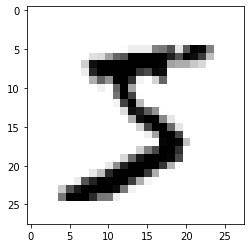

In [0]:
#1414 顯示矩陣圖片 訓練集/測試集
# 圖片在輸出cell內
%matplotlib inline 
from matplotlib.pyplot import imshow # matplot繪圖模組 1-5會解說
import matplotlib.pyplot as plt 
imshow(x_train[0], cmap='gray_r')

### 練習3.顯示`測試集`圖片

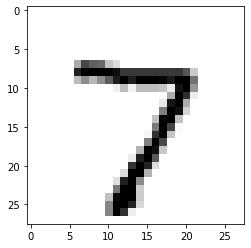

In [0]:
#1415 x在數據集中代表"數據本體"
imshow(x_test[0], cmap='gray_r')

### 理解數據集的`標籤label`

In [0]:
#1416 y在數據集中代表"數據的標籤"
y_test[0]

7

### 練習題4.同時顯示`x數據本體`與`y標籤`

   第 100 筆數據，標籤是 6


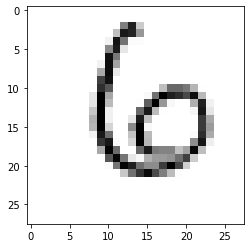

In [0]:
#1417  顯示測試集
num = 100 #第幾筆資料，可自行修改值
print("   第",num,"筆數據，標籤是",y_test[num])
imshow(x_test[num], cmap='gray_r')
#顯示訓練集 test 改成 train 即可，同學多試試吧

   第 100 筆數據，標籤是 5


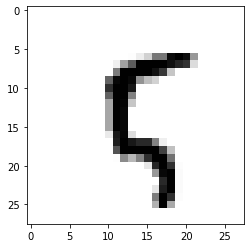

In [0]:
num = 100 #第幾筆資料，可自行修改值
print("   第",num,"筆數據，標籤是",y_train[num])
imshow(x_train[num], cmap='gray_r')

## 1-4 總結: 什麼是數據集?



### 舉例來說 如果把AI`深度學習模型`比喻為"`學生`"
### 1.`訓練集` > `課本`，學生學習某一學科的課本的內容來掌握知識(`提取特徵`)。
### 2.`驗證集` > `作業`，通過作業可以知道學生學習情況、進步的速度快慢(`回饋訓練過程`)。
### 3.`測試集` > `考試`，好的考題是學生都沒有看過的，測試學生對於該學科的知識能力(`模型性能`)。


![alt text](https://images.pexels.com/photos/256468/pexels-photo-256468.jpeg?auto=compress&cs=tinysrgb&dpr=2&w=250)

## Homework: 自主延伸學習~探索數據集
### 深度學習需要`優質的數據`，各領域的數據激發`深度學習的應用`

### 手寫數字數據集(MNIST) 1-6會實作訓練與預測
http://yann.lecun.com/exdb/mnist/
### 台灣政府資料開放平台：
https://data.gov.tw/
### 香港政府數據中心(中文繁體):
https://data.gov.hk/tc/

# NEXT: 1-5_數據分析與視覺化實作